In [ ]:
# !pip install fuzzy-c-means

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.15.2
    Uninstalling typer-0.15.2:
      Successfully uninstalled typer-0.15.2
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.42.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from fcmeans import FCM

In [4]:
pd.set_option("display.max_rows", None)  # Mostrar todas las filas
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas

### Se ingresa la  sabana de datos limpia

## Unir a previo a encode

In [ ]:
import pandas as pd

In [ ]:
df_anomaly_encoded = pd.read_excel("df_anomaly_encoded_limpio.xlsx")

In [ ]:
df_anomaly_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160640 entries, 0 to 160639
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Usuario         160640 non-null  int64  
 1   id              160640 non-null  int64  
 2   AREA            160640 non-null  int64  
 3   PLAN_COMERCIAL  160640 non-null  int64  
 4   LATI_USU        160640 non-null  float64
 5   LONG_USU        160640 non-null  float64
 6   evaluacion      160640 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 8.6 MB


In [ ]:
df_nuevo_extendido_fzz.columns

Index(['Orden', 'Usuario', 'Ejecucion', 'Codigo', 'Descripcion', 'Motivo',
       'kWh Rec', 'Factor', 'id', 'Nombre', 'Factor.1', 'AREA',
       'PLAN_COMERCIAL', 'TRAFO_OPEN', 'FASES', 'KVA', 'LATI_USU', 'LONG_USU',
       'puntaje', 'evaluacion', 'fuzzy_cluster'],
      dtype='object')

In [ ]:
df_anomaly_encoded["Cluster"] = df_nuevo_extendido_fzz["fuzzy_cluster"]

In [ ]:
df_anomaly_encoded_copy = df_anomaly_encoded.copy()

In [ ]:
df_anomaly_encoded_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160640 entries, 0 to 160639
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Usuario         160640 non-null  int64  
 1   id              160640 non-null  int64  
 2   AREA            160640 non-null  int64  
 3   PLAN_COMERCIAL  160640 non-null  int64  
 4   LATI_USU        160640 non-null  float64
 5   LONG_USU        160640 non-null  float64
 6   evaluacion      160640 non-null  int64  
 7   Cluster         160640 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 9.8 MB


In [ ]:
df_anomaly_encoded.to_csv("df_anomaly_encoded_fzz_nw.csv", index=False)

In [ ]:
df_anomaly_encoded_original = df_anomaly_encoded.drop(labels=["Cluster"], axis=1).copy()

In [ ]:
df_anomaly_encoded = df_anomaly_encoded.drop(labels=["evaluacion", "id"], axis=1).copy()

In [ ]:
df_anomaly_encoded = df_anomaly_encoded.drop(labels=["Cluster"], axis=1).copy()

In [ ]:
df_anomaly_encoded.columns

Index(['Usuario', 'AREA', 'PLAN_COMERCIAL', 'LATI_USU', 'LONG_USU'], dtype='object')

In [ ]:
# 1. Preparar los datos
data = df_anomaly_encoded[
    ["Usuario", "AREA", "PLAN_COMERCIAL", "LATI_USU", "LONG_USU"]
].values

In [ ]:
# # Escalar los datos
# scaler = StandardScaler()
scaled_data = data.copy()

In [ ]:
# 2. Aplicar Fuzzy C-means
n_clusters = 3  # Define el número de clusters deseado
fcm = FCM(n_clusters=n_clusters)
fcm.fit(scaled_data)

In [ ]:
# 3. Analizar los resultados
# Obtener los grados de pertenencia
fcm_centers = fcm.centers
fcm_labels = fcm.u.argmax(axis=1)  # Asignación "hard" (opcional)
fcm_u = fcm.u  # Grados de pertenencia

In [ ]:
# Añadir los resultados al DataFrame original
df_anomaly_encoded_original["fuzzy_cluster_2"] = fcm_labels

# Mostrar los grados de pertenencia (opcional)
print("Grados de pertenencia:")
print(fcm_u)

# Mostrar los centros de los clusters
print("\nCentros de los clusters:")
print(fcm_centers)

# # Mostrar el DataFrame con los clusters asignados
# print("\nDataFrame con clusters difusos:")
# print(df_label_encoded_cluster_fzz[['id', 'fuzzy_cluster']])

Grados de pertenencia:
[[7.70210210e-03 9.92256306e-01 4.15914625e-05]
 [9.99764908e-01 2.33295228e-04 1.79667864e-06]
 [7.33918700e-03 9.92621038e-01 3.97749518e-05]
 ...
 [2.81888983e-02 9.71678149e-01 1.32952477e-04]
 [2.81888983e-02 9.71678149e-01 1.32952477e-04]
 [2.81888983e-02 9.71678149e-01 1.32952477e-04]]

Centros de los clusters:
[[ 1.13233962e+06  1.73072346e+00  4.69129954e+00  1.72697554e+00
  -7.86620829e+01]
 [ 4.92519996e+05  1.70588909e+00  4.73086893e+00  1.72201135e+00
  -7.86906195e+01]
 [ 8.54616721e+06  1.93240463e+00  4.98073460e+00  1.76435402e+00
  -7.86561554e+01]]


In [ ]:
df_anomaly_encoded_original["fuzzy_cluster_2"].value_counts()

,count
fuzzy_cluster_2,
0,107627
1,46267
2,6746


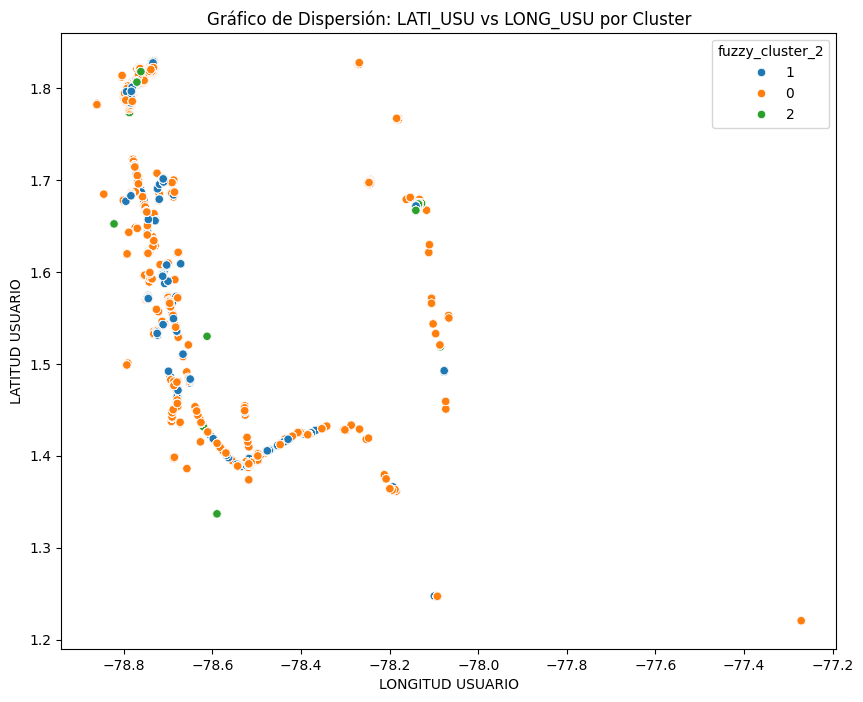

In [ ]:
# Asegúrate de que 'Cluster' sea numérico o categórico
df_anomaly_encoded_original["fuzzy_cluster_2"] = df_anomaly_encoded_original[
    "fuzzy_cluster_2"
].astype(str)  # O numérico si es apropiado

# Crea el gráfico de dispersión con colores basados en 'Cluster'
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
sns.scatterplot(
    x="LONG_USU", y="LATI_USU", hue="fuzzy_cluster_2", data=df_anomaly_encoded_original
)

# Añade etiquetas y título
plt.title("Gráfico de Dispersión: LATI_USU vs LONG_USU por Cluster")
plt.xlabel("LONGITUD USUARIO")
plt.ylabel("LATITUD USUARIO")

# Muestra la leyenda (automática con 'hue')
plt.legend(title="fuzzy_cluster_2")

# Muestra el gráfico
plt.show()

In [ ]:
df_nuevo_extendido["Cluster"] = df_anomaly_encoded_original["fuzzy_cluster_2"]

In [ ]:
# import pandas as pd

# # Suponiendo que df_nuevo_extendido y df_anomaly_encoded_original ya están definidos

# df_nuevo_extendido = pd.concat([df_nuevo_extendido, df_anomaly_encoded_original['fuzzy_cluster_2']], axis=1)

In [ ]:
df_nuevo_extendido.columns

Index(['Orden', 'Usuario', 'Ejecucion', 'Codigo', 'Descripcion', 'Motivo',
       'kWh Rec', 'Factor', 'id', 'Nombre', 'Factor.1', 'AREA',
       'PLAN_COMERCIAL', 'TRAFO_OPEN', 'FASES', 'KVA', 'LATI_USU', 'LONG_USU',
       'puntaje', 'evaluacion', 'fuzzy_cluster_2'],
      dtype='object')

In [ ]:
df_nuevo_extendido.to_csv("df_anomaly_encoded_fzz_2_ind.csv", index=False)

In [ ]:
df_nuevo_extendido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160640 entries, 0 to 160639
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Orden           160640 non-null  int64  
 1   Usuario         160640 non-null  int64  
 2   Ejecucion       160640 non-null  object 
 3   Codigo          160640 non-null  object 
 4   Descripcion     160640 non-null  object 
 5   Motivo          155299 non-null  object 
 6   kWh Rec         137436 non-null  float64
 7   Factor          41 non-null      float64
 8   id              160640 non-null  int64  
 9   Nombre          160640 non-null  object 
 10  Factor.1        41 non-null      float64
 11  AREA            160640 non-null  object 
 12  PLAN_COMERCIAL  160640 non-null  object 
 13  TRAFO_OPEN      160594 non-null  object 
 14  FASES           159188 non-null  float64
 15  KVA             160640 non-null  float64
 16  LATI_USU        160640 non-null  float64
 17  LONG_USU  

# Revisión para continuación

In [ ]:
# Simulación de aplicación de FCM (reemplaza con tu código real)
n_clusters = 3  # Define el número de clústeres
fcm = FCM(n_clusters=n_clusters, random_state=42)
fcm.fit(df.values)  # Asegúrate de pasar los datos como un array de NumPy

# 1. Obtener los grados de pertenencia a cada clúster
fcm_u = fcm.u
df_u = pd.DataFrame(
    fcm_u.T, columns=[f"Grado_Cluster_{i + 1}" for i in range(n_clusters)]
)
# Transponemos fcm.u (.T) para que cada columna represente un clúster
# y las filas correspondan a los puntos de datos originales.
# Asignamos nombres de columna descriptivos.

# 2. Obtener el clúster final de asociación (asignación "hard")
fcm_labels = np.argmax(fcm_u, axis=0)
df_labels = pd.DataFrame(fcm_labels, columns=["Cluster_Asignado"])

# 3. Integrar los grados de pertenencia y la asignación final al DataFrame original (opcional)
df_con_clusters = pd.concat([df, df_u, df_labels], axis=1)

# Mostrar las primeras filas del DataFrame con los resultados
print(df_con_clusters.head())

# Puedes acceder a los grados de pertenencia a un clúster específico así:
print("\nGrados de pertenencia al Clúster 1:")
print(df_con_clusters["Grado_Cluster_1"].head())

# Y al clúster asignado a cada punto así:
print("\nClúster asignado a cada punto:")
print(df_con_clusters["Cluster_Asignado"].head())